In [26]:
import numpy as np
import matplotlib.pyplot as plt
import json

# Define studied plots

In [80]:
monitored_runs = ["../results/LSTMConfig/20180307_214204/", 
                  "../results/LSTMConfig/20180307_221233/", 
                  "../results/LSTMConfig/20180307_222241/", 
                  "../results/LSTMConfig/20180307_224742/", 
                  "../results/LSTMConfig/20180307_224744/", 
                  "../results/LSTMConfig/20180307_223706/", 
                  "../results/LSTMConfig/20180307_224745/",
                 ]

labels = ["base LSTM", 
          "learning rate * 10", 
          "batch size x2",
          "extra layer, learning rate * 10, AdaGrad",
          "learning rate * 10 + AdaGrad",
          "AdaGrad",
          "extra layer"]

In [73]:
all_results[0].params

{'adaptative_lr': False,
 'batch_size': 128,
 'data_train': 'data/ner_dataset.csv',
 'extra_layer': False,
 'hidden_size': 20,
 'l2': None,
 'learning_rate': 0.0005,
 'model': 'lstm',
 'n_epochs': 30,
 'no_result': False,
 'tiny': False,
 'train_fraction': 0.9,
 'vectors': 'data/en-cw.txt'}

In [79]:
for k in all_results[0].params:
    if all_results[0].params[k] != all_results[3].params[k]:
        print(k, ": ", all_results[0].params[k],  "!=", all_results[3].params[k])

adaptative_lr :  False != True
extra_layer :  False != True
learning_rate :  0.0005 != 0.005


In [51]:
class RunResult(object):
    def load_los_file(self, filename):
        values = []
        with open(self.runpath + filename, 'r') as f:
            for l in f:
                values.append(float(l.strip()))
        return values
    
    def filenames(self):
        return ["dev_f1.los", "dev_losses.los", "dev_precision.los", "dev_recall.los",
                "train_f1.los", "train_losses.los", "train_precision.los", "train_recall.los"]
    
    def __init__(self, runpath):
        self.runpath = runpath
        self.results_dic = {}
        for filename in self.filenames():
            self.results_dic[filename] = self.load_los_file(filename)
        with open(self.runpath + "params.json") as f:
            self.params = json.load(f)

In [52]:
all_results = [RunResult(monitored_run) for monitored_run in monitored_runs]

# Plots

### Train F1 evolution per config

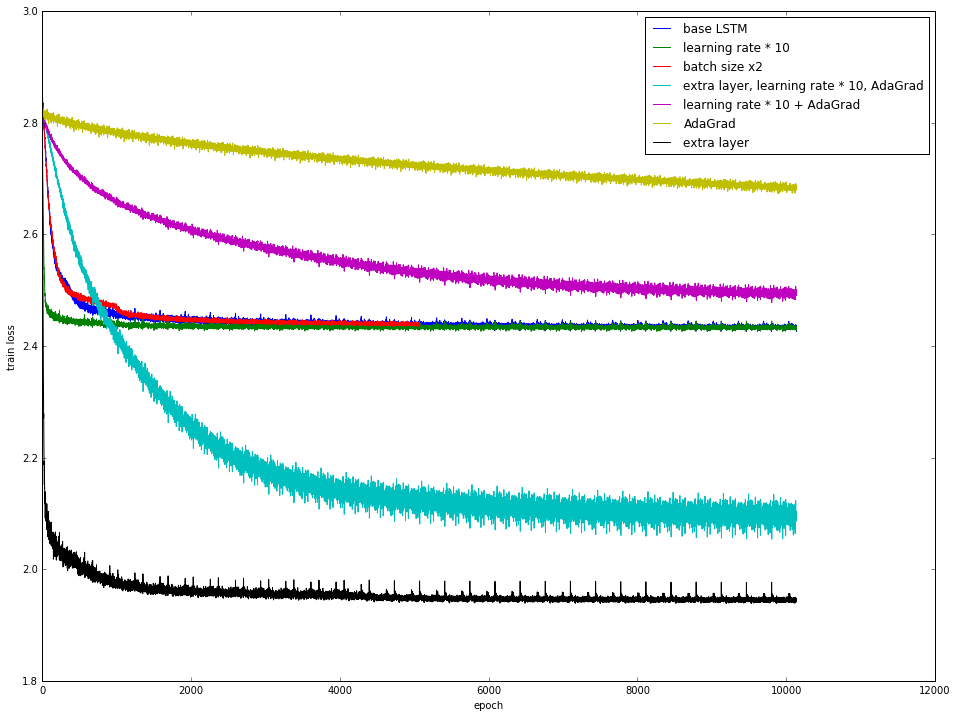

In [84]:
plt.figure(figsize = (16, 12))

for result, label in zip(all_results, labels):    
    plt.plot(result.results_dic["train_losses.los"], label = label)

plt.xlabel("epoch")
plt.ylabel("train loss")
plt.legend()
    
#plt.ylim((0, 1))
plt.show()

### Train F1 evolution per config

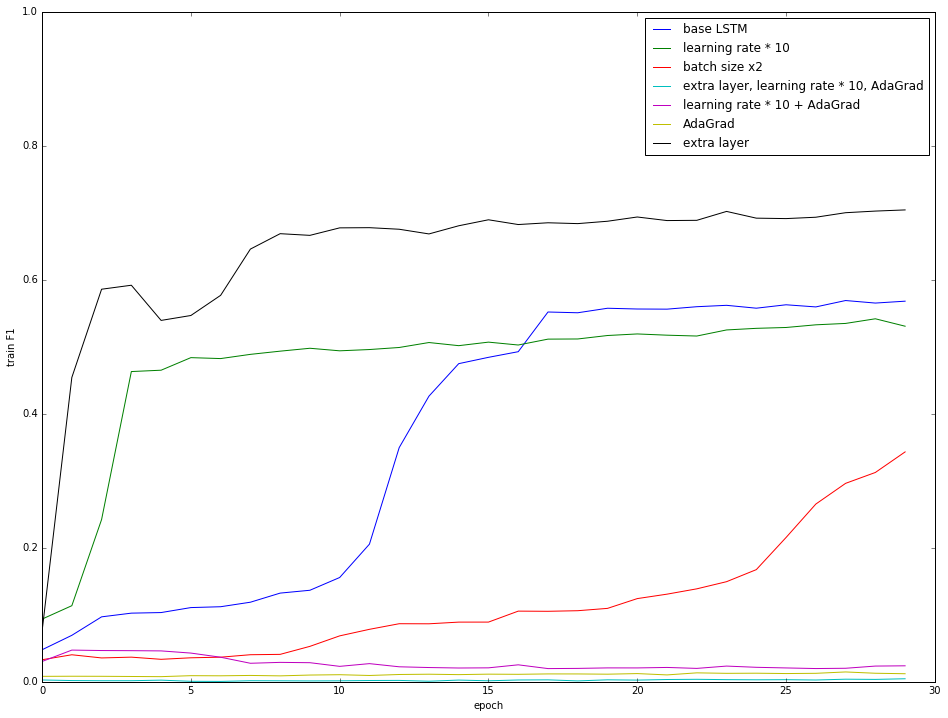

In [85]:
plt.figure(figsize = (16, 12))

for result, label in zip(all_results, labels):    
    plt.plot(result.results_dic["train_f1.los"], label = label)

plt.xlabel("epoch")
plt.ylabel("train F1")
plt.legend()
    
plt.ylim((0, 1))
plt.show()